In [ ]:
!conda list gdal


In [ ]:
from osgeo import gdal
print(gdal.__version__)


In [ ]:
import sys
print(sys.executable)

In [ ]:
from osgeo import gdal
from osgeo import osr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, HTML
from pprint import pprint

import numpy as np
import os
import matplotlib.pyplot as plt
import math
%matplotlib ipympl

In [ ]:
# os.chdir(r'G:\156Geoprocessing\Lectures\DLP_Data-20250217T112909Z-001\DLP_Data')

In [ ]:
file_name='F:/SHIKHER-VS/Advance-Python-SJ/Geographic Information System & Remote Sensing (GIS&RS)/DLP_Lectures/haridwar.tif'

In [ ]:
raster_info = gdal.Info(file_name, format='json')

In [ ]:
pprint(raster_info)
# print(raster_info['size'])
# print(raster_info['coordinateSystem'])

In [ ]:
ds = gdal.Open(file_name)
ds

In [ ]:
print('File list:', ds.GetFileList())

In [18]:
print('Width:', ds.RasterXSize)

Width: 2000


In [17]:
print('Height:', ds.RasterYSize)

Height: 2000


In [19]:
print('Coordinate system:', ds.GetProjection())

Coordinate system: PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]


In [20]:
gt = ds.GetGeoTransform()
gt

(225478.94308370308, 5.0, 0.0, 3324407.5, 0.0, -5.0)

In [21]:
print('Origin:', (gt[0], gt[3]))
print('Pixel size:', (gt[1], gt[5]))

Origin: (225478.94308370308, 3324407.5)
Pixel size: (5.0, -5.0)


In [22]:
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper Left Corner: [225478.94308370308, 3324407.5]
Upper Right Corner: [235478.94308370308, 3324407.5]
Lower Left Corner: [225478.94308370308, 3314407.5]
Lower Right Corner: [235478.94308370308, 3314407.5]
Center: [230478.94308370308, 3319407.5]


In [23]:
print('Metadata:', ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [24]:
print('Number of bands:', ds.RasterCount)

Number of bands: 3


In [25]:
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i) # in GDAL, band are indexed starting at 1!
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h)=band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) # but overview bands starting at 0
        print(' Overview %d: %dx%d'%(j, ovr_band.XSize, ovr_band.YSize))

Band 1, block size 2000 1, color interp Gray
 Overview 0: 1000x1000
 Overview 1: 500x500
 Overview 2: 250x250
Band 2, block size 2000 1, color interp Undefined
 Overview 0: 1000x1000
 Overview 1: 500x500
 Overview 2: 250x250
Band 3, block size 2000 1, color interp Undefined
 Overview 0: 1000x1000
 Overview 1: 500x500
 Overview 2: 250x250


In [26]:
del ds

In [27]:
ds = gdal.Open(file_name)

In [28]:
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max={:.3f},mean={:.3f},stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))

Band1, min=40.000, max=231.000,mean=58.319,stddev=11.156
Band2, min=28.000, max=214.000,mean=48.770,stddev=14.741
Band3, min=34.000, max=306.000,mean=99.982,stddev=24.430


In [32]:
band = ds.GetRasterBand(1)


In [31]:
data = band.ReadAsArray()

In [33]:
data

array([[158, 154, 152, ...,  99,  96,  96],
       [146, 143, 138, ...,  94,  90,  90],
       [142, 137, 126, ..., 103,  98,  95],
       ...,
       [130, 137, 126, ...,  78,  90, 112],
       [123, 128, 125, ...,  74,  82, 100],
       [121, 123, 123, ...,  76,  80,  93]],
      shape=(2000, 2000), dtype=uint16)

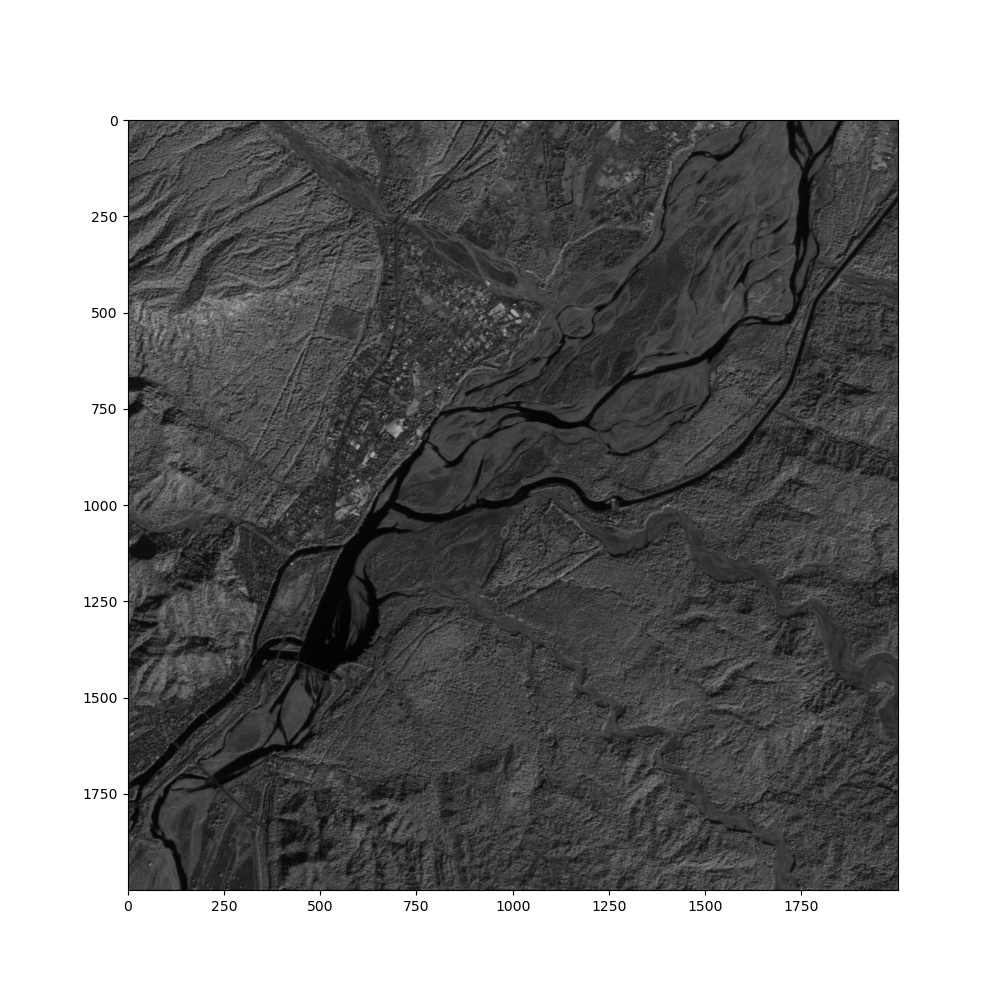

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')

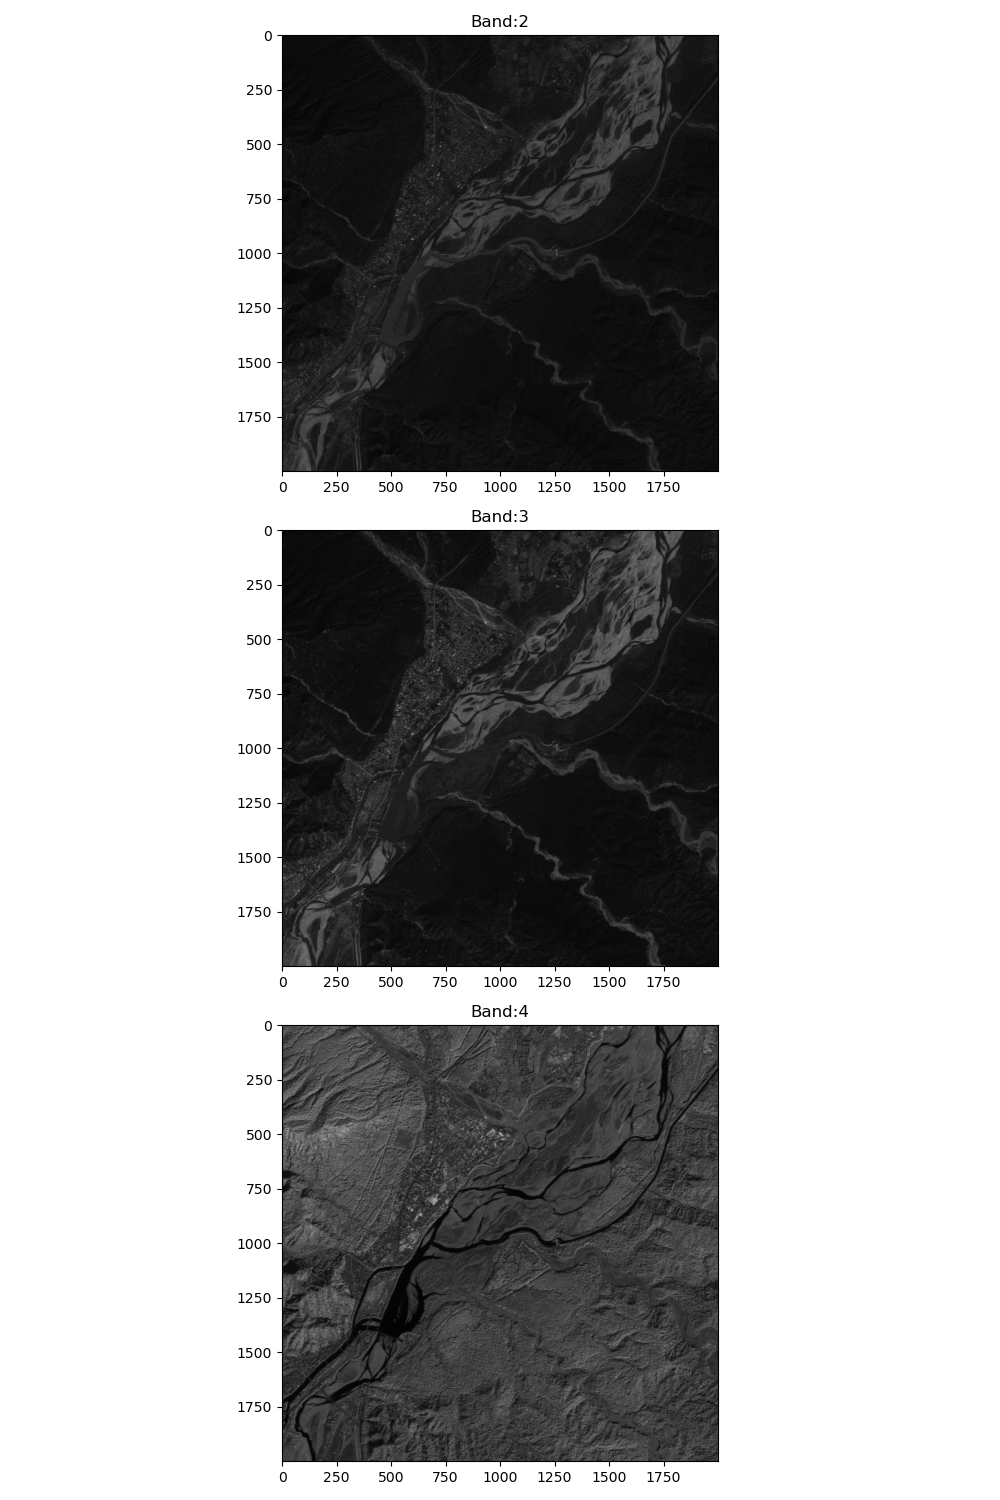

In [35]:
plt.figure(figsize=(10,15))
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    plt.subplot(3,1,i)
    plt.title('Band:'+str(i+1))
    plt.imshow(band.ReadAsArray(),cmap='gray')
    plt.tight_layout()

In [36]:
plt.close()